# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Juan Samuel Christopher
- **Email:** juansamuelchris@gmail.com
- **ID Dicoding:** juansamuel

## Menentukan Pertanyaan Bisnis

1.   How have bicycle usage trends changed over the years? Is there a significant increase or decrease?
2.   Is there a correlation between weather (eg temperature, humidity, or other weather conditions) and the level of bicycle use?
3.   How does the season affect the number of bicycle rentals?

## Import Semua Packages/Library yang Digunakan

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Variables Description**
* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit - `1: Clear, Few clouds, Partly cloudy, Partly cloudy. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

## Data Wrangling

### Gathering Data

* Read the "day.csv" data and store it to "day_df" variable

In [159]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Read the "hour.csv" data and store it to "hour_df" variable

In [160]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data



#### **1. Assesing data day.csv**

In [161]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Check for missing value & Data type**

The amount of data in **day_df** are complete (all data shows non-null) that means there are no missing values. But there's a mistake in the data type in the column as such :
*   dteday should be of data type datetime, not object
*   season should be of data type category, not int
*   yr should be of data type category, not int
*   mnth should be of data type category, not int.
*   holiday should be of data type category, not int.
*   weekday should be of data type category, not int.
*   weathersit should be of data type category, not int.
*   workingday should be of data type category, not int.


**Changing a couple of column names**

There's some column that a bit hard to read and not well written, so i'll change it into easier and more readible name. As such :     
* dteday => datetime
* cnt => count
* mnth => month
* yr => year

**Checking for duplicate data**

In [162]:
print("Total duplicate:", day_df.duplicated().sum())

Total duplicate: 0


There's no duplicate data in data **day_df**

**Checking for invalid value**

In [163]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


All column look safe. So there's no any invalid value in data **day_df**

#### **2. Assesing data hour.csv**

In [164]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Check for missing value & Data type**

The amount of data in **hour_df** are complete (all data shows non-null) that means there are no missing values. But there's a mistake in the data type in the column as such :
*   dteday should be of data type datetime, not object
*   season should be of data type category, not int
*   yr should be of data type category, not int
*   mnth should be of data type category, not int.
*   holiday should be of data type category, not int.
*   weekday should be of data type category, not int.
*   weathersit should be of data type category, not int.

**Changing a couple of column names**

There's some column that a bit hard to read and not well written, so i'll change it into easier and more readible name. As such :     
* dteday => datetime
* cnt => count
* mnth => month
* yr => year

**Checking for duplicate data**

In [165]:
print("Total duplicate:", hour_df.duplicated().sum())

Total duplicate: 0


There's no duplicate data in data **hour_df**

**Checking for invalid value**

In [166]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


All column look safe. So there's no any invalid value in data **hour_df**

### Cleaning Data

#### **1. Cleaning data day.csv**

* **Changing the data type**

In [167]:
column_datetime = ['dteday']
column_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']

for column in column_datetime:
  day_df[column] = pd.to_datetime(day_df[column])

for column in column_category:
  day_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

* **Fixing the columns naming**

In [168]:
day_df.rename(columns={'dteday': 'datetime', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

Now, the data in **day.csv** has been cleaned and fixed.

#### **2. Cleaning data hour.csv**

* **Changing the data type**

In [169]:
column_datetime = ['dteday']
column_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for column in column_datetime:
  hour_df[column] = pd.to_datetime(hour_df[column])

for column in column_category:
  hour_df[column] = hour_df[column].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

* **Fixing the columns naming**

In [170]:
hour_df.rename(columns={'dteday': 'datetime', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

Now, the data in **hour.csv** has been cleaned and fixed.

#### **3. Exporting clean data**

In [171]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore data **day_df**

In [172]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

* **Searching for correlation**

In [173]:
day_df.corr(numeric_only=True)

,instant,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


* **The increase amount of rents over the year**

In [174]:
day_df.groupby(by='year')['month'].nunique()

year
0    12
1    12
Name: month, dtype: int64

In [175]:
day_df[['year', 'count']].groupby('year').sum()

,count
year,
0,1243103
1,2049576


In year 0 (2011) it has totals of 1243103 rents and in year 1 (2012) the totals are 2049576 of rents. That means there's an significant increase of rents from year 2011 to 2012.

* **Correlation month with rent amount**

In [176]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
        max   min         mean     sum          std
month                                              
1      4521   431  2176.338710  134933  1161.674370
2      5062  1005  2655.298246  151352  1145.313307
3      8362   605  3692.258065  228920  1899.301812
4      7460   795  4484.900000  269094  1776.160778
5      8294  2633  5349.774194  331686  1298.711561
6      8120  3767  5772.366667  346342  1240.400031
7      8173  3285  5563.677419  344948  1273.751871
8      7865  1115  5664.419355  351194  1494.516146
9      8714  1842  5766.516667  345991  1810.130649
10     8156    22  5199.225806  322352  1988.392517
11     6852  1495  4247.183333  254831  1285.712709
12     6606   441  3403.806452  211036  1549.639353

As we can see from the "sum" data , that from month 5 to month 9 there's an increase amount of bike rents, after that the amount slowly decreased.

* **Correlation between weather with rents amount**

In [177]:
day_df[['weathersit','count']].groupby(by='weathersit').sum()

,count
weathersit,
1,2257952
2,996858
3,37869


Based on the variable description, we know the desc for weathersit. That means 1=clear , 2=Mist/cloudy. 3: Light rain/snow. Looking by the data we know that Clear weather has the most total rents then the least amount of rents is when Light rain/snow

* **Correlation between season with rents amount**

In [178]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

1 = spring, 2 = summer, 3 = fall, 4 = winter

Based on the table above, we know that the 3rd season (fall season) had the highest rent amount

### Explore data **hour_df**

In [179]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

* **Checking for correlation**

In [180]:
hour_df.corr(numeric_only=True)

,instant,hour,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,-0.004775,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hour,-0.004775,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
temp,0.136178,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
count,0.278379,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


From the data above hour,temp and atemp has a correlation above 0.3

* **Correlation weather with bike rents**

In [181]:
hour_df[['weathersit','count']].groupby(by='weathersit').sum()

,count
weathersit,
1,2338173
2,795952
3,158331
4,223


Based on the variable description, we know the desc for weathersit. That means 1=clear , 2=Mist/cloudy. 3: Light rain/snow. 4: Heavy rain/snow. Looking by the data we know that Clear weather has the most total rents then the least amount of rents is when Heavy rain/snow.

* **Correkation season with bike rents**

In [182]:
hour_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                     
         max min        mean      sum         std
season                                           
1        801   1  111.114569   471348  119.224010
2        957   1  208.344069   918589  188.362473
3        977   1  236.016237  1061129  197.711630
4        967   1  198.868856   841613  182.967972

1 = spring, 2 = summer, 3 = fall, 4 = winter

Based on the table above, we know that the 3rd season (fall season) had the highest rent amount

## Visualization & Explanatory Analysis

### Pertanyaan 1: How have bicycle usage trends changed over the years? Is there a significant increase or decrease?

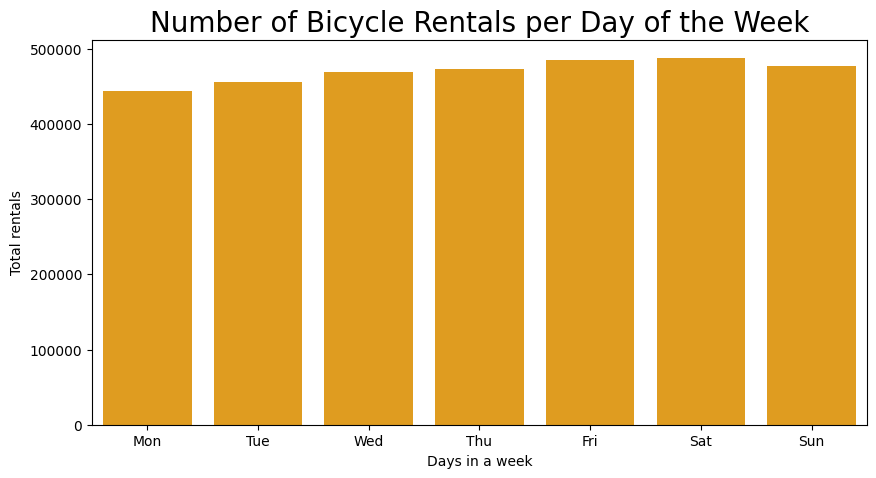

In [183]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

weekly_rents_df = day_df.groupby('weekday')['count'].sum()
weekly_rents_df = weekly_rents_df.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_rents_df, x="weekday", y="count", color="orange", errorbar=None)
plt.title("Number of Bicycle Rentals per Day of the Week", loc="center", fontsize=20)
plt.xlabel('Days in a week')
plt.ylabel('Total rentals')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

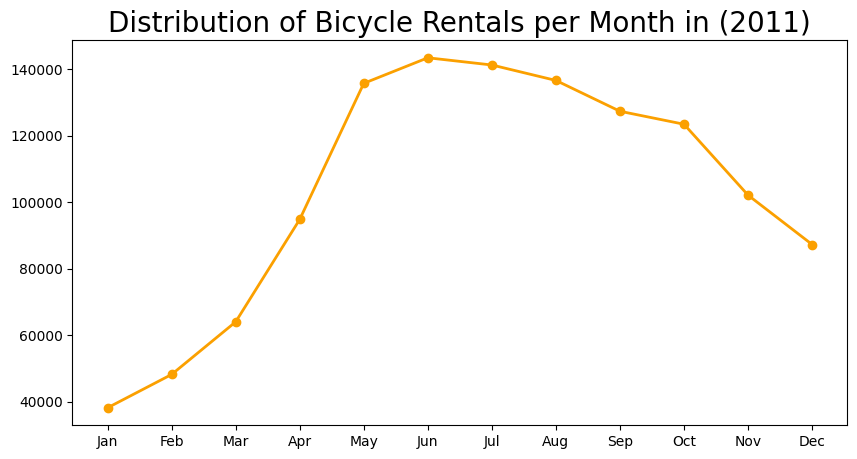

In [184]:
monthly_2011_df = day_df[day_df['year']==0][['month','count']].groupby('month').sum()
monthly_2011_df  = monthly_2011_df.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_2011_df["month"], monthly_2011_df["count"], marker='o', linewidth=2, color="#FBA000")
plt.title("Distribution of Bicycle Rentals per Month in (2011)", loc="center", fontsize=20)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As we can see from the data above. We see a pretty significant increase of bike usage, starting from January until its peak month which is June. From then it slowly going down until the end of the year of 2011

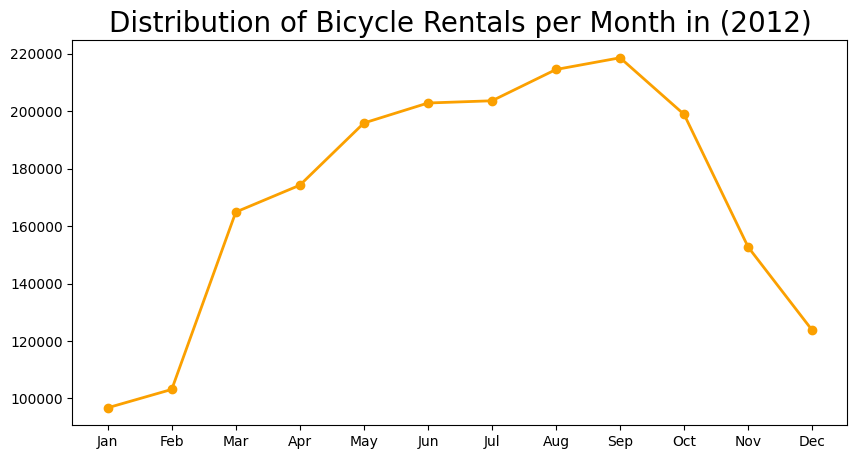

In [185]:
monthly_2012_df = day_df[day_df['year']==1][['month','count']].groupby('month').sum()
monthly_2012_df  = monthly_2012_df.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_2012_df["month"], monthly_2012_df["count"], marker='o', linewidth=2, color="#FBA000")
plt.title("Distribution of Bicycle Rentals per Month in (2012)", loc="center", fontsize=20)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the data above, we can see that this year of bike usage has even more amount of rents, starts from January then has a pretty massive increase to March, then it keeps getting more popular until its peak month which is September. From then it went down pretty fast until December.

### Pertanyaan 2: Is there a correlation between weather (eg temperature, humidity, or other weather conditions) and the level of bicycle use?

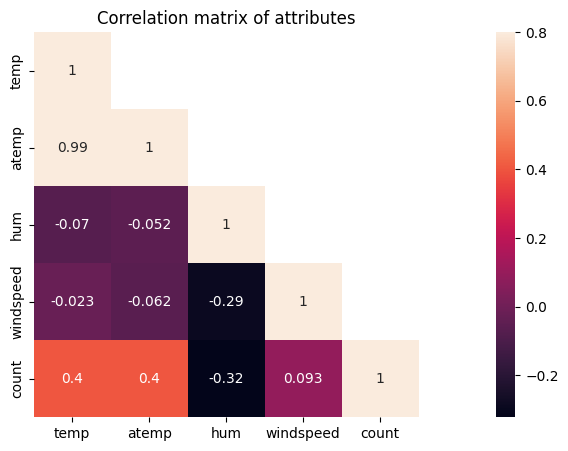

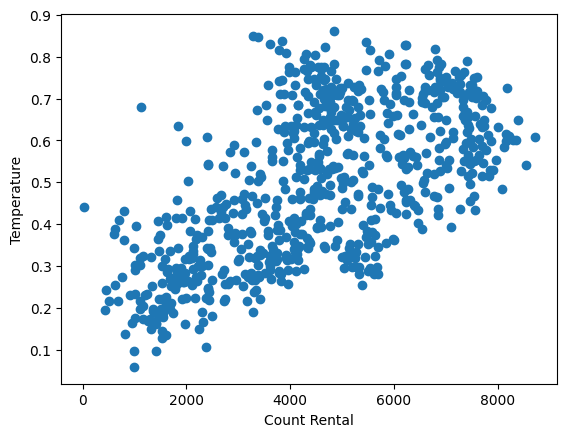

In [186]:
correMtr=hour_df[["temp","atemp","hum","windspeed","count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

plt.scatter(x=day_df['count'], y=day_df['temp'])
plt.xlabel('Count Rental')
plt.ylabel('Temperature')
plt.show()

From the heatmap data above, we can take a couple conclusion that :

*  weather and humidity have a negative correlation which means they are opposites
* temperature and windspeed have a positive correlation
* and the temperature have the highest correlation which is 0.63
* temperature does efffects the amount of bike rents

### Pertanyaan 3: How does the season affect the number of bicycle rentals?

In [187]:
seasonly_rents = day_df[['count','season']].groupby(by='season').sum().reset_index()
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
seasonly_rents['season'] = seasonly_rents['season'].map(season_map)
seasonly_rents.sort_values(by='count',inplace=True)
seasonly_rents= seasonly_rents.reset_index()
seasonly_rents

,index,season,count
0,0,spring,471348
1,3,winter,841613
2,1,summer,918589
3,2,fall,1061129


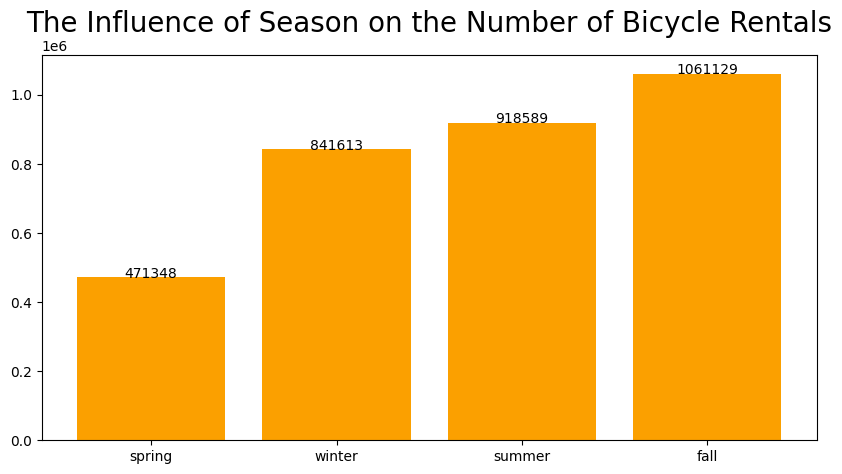

In [188]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


plt.figure(figsize=(10, 5))
plt.bar(x=seasonly_rents['season'], height=seasonly_rents['count'],color='#FBA000')
plt.title("The Influence of Season on the Number of Bicycle Rentals", loc="center", fontsize=20)
addlabels(seasonly_rents['season'],seasonly_rents['count'])
plt.show()

From the data above, we can see that the busiets season of bike rents is at Fall, and the least busy is at Spring

### RFM Analysis

In [189]:
day_df.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


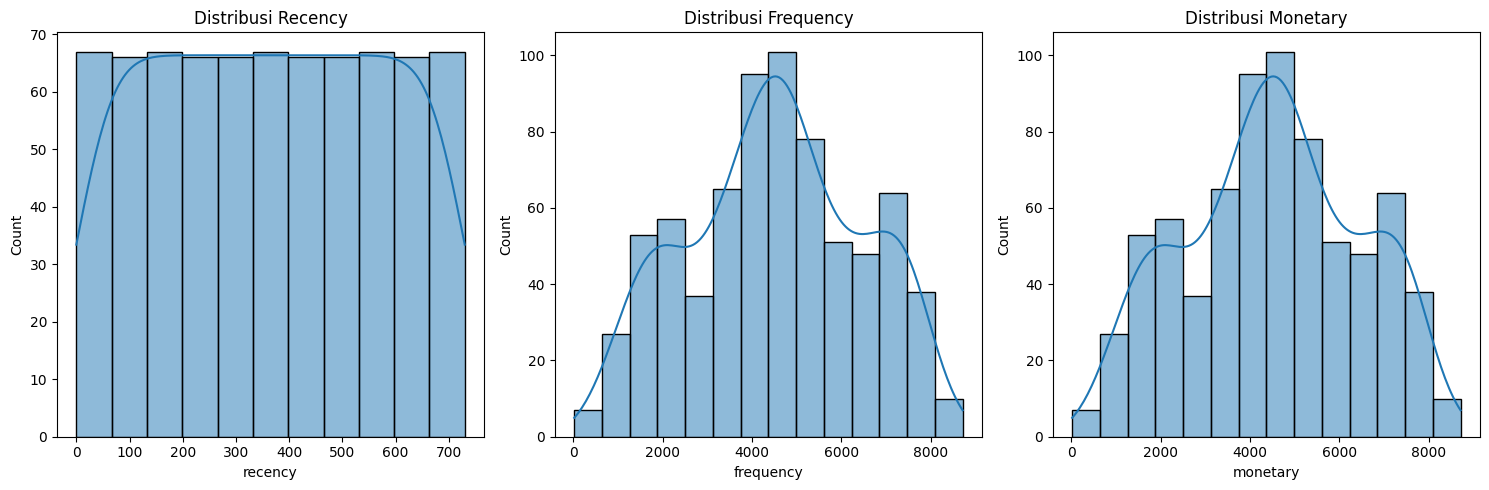

In [190]:
# Konversi kolom 'datetime' ke dalam tipe data datetime
day_df['datetime'] = pd.to_datetime(day_df['datetime'])

# Recency: Tanggal terakhir sewa
recent_date = day_df['datetime'].max()
day_df['recency'] = (recent_date - day_df['datetime']).dt.days

# Frequency: Jumlah sewa
rentals_count = day_df.groupby('instant')['count'].sum()
day_df['frequency'] = day_df['instant'].map(rentals_count)

# Monetary: Total pendapatan sewa per pelanggan
monetary_value = day_df.groupby('instant')['count'].sum()
day_df['monetary'] = day_df['instant'].map(monetary_value)

# Visualisasi RFM
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(day_df['recency'], kde=True)
plt.title('Distribusi Recency')

plt.subplot(1, 3, 2)
sns.histplot(day_df['frequency'], kde=True)
plt.title('Distribusi Frequency')

plt.subplot(1, 3, 3)
sns.histplot(day_df['monetary'], kde=True)
plt.title('Distribusi Monetary')

plt.tight_layout()
plt.show()

* Recency Distribution:

The distribution of recency shows the time elapsed since the last rental. A peak in the histogram at lower values would indicate that many customers have rented bikes recently, while a peak at higher values would suggest that many customers have not rented bikes for a longer period.
If the histogram shows a peak at lower values, it indicates that the business is attracting and retaining customers effectively, as they are renting bikes frequently.

* Frequency Distribution:

The distribution of frequency shows how often customers rent bikes. A higher frequency indicates that customers are renting bikes more frequently, which could suggest loyalty and satisfaction with the service.
A wider distribution with a significant number of customers renting bikes infrequently may indicate opportunities for increasing customer engagement or marketing efforts to encourage more frequent rentals.

* Monetary Distribution:

The distribution of monetary value represents the total revenue generated from bike rentals per customer. A higher monetary value indicates that customers are spending more on rentals.
A wider distribution with a significant number of customers with low monetary value may indicate that there are customers who are renting bikes but spending less. This could be an opportunity to upsell or cross-sell additional services or products to increase revenue per customer.

## Conclusion

- Conclution pertanyaan 1

Based on the provided data, it is evident that there has been a substantial increase in bike usage over the specified time periods. In both years mentioned (2011 and 2012), there is a clear trend of rising bike rentals from January onwards, reaching a peak in June for 2011 and September for the current year. However, following the peak months, there is a notable decline in bike rentals, with usage decreasing steadily towards the end of each year. This suggests a seasonal pattern in bike usage, with warmer months typically seeing higher demand. Furthermore, in 2012 appears to exhibit even higher levels of bike rentals compared to the previous year, indicating a potential increase in the popularity and adoption of biking as a mode of transportation.
- Conclution pertanyaan 2

The heatmap data analysis reveals several significant correlations between weather variables and their impact on bike rentals. Firstly, there is a notable negative correlation observed between weather and humidity, indicating an inverse relationship between the two factors. This suggests that as weather conditions improve, such as becoming clearer or less rainy, humidity tends to decrease. Additionally, a positive correlation exists between temperature and windspeed, implying that as temperatures rise, windspeed tends to increase. Notably, temperature emerges as the variable with the highest correlation coefficient, at 0.63, suggesting a strong positive relationship with bike rentals. This finding aligns with common expectations, as warmer temperatures typically lead to increased outdoor activities, including biking. Overall, the data underscores the significant impact of temperature on bike rental patterns, highlighting its influence as a key determinant of biking behavior in relation to weather conditions.
- Conclusion pertanyaan 3

Based on the provided data, it's evident that the count of bike rentals varies significantly across different seasons. Fall, represented by index 2, has the highest count of bike rentals at 1,061,129, followed closely by Summer with 918,589 rentals. Winter comes next with 841,613 retanls, while spring has the lowest count at 471,348 rentals. This suggests a seasonal pattern in bike rental demand, with colder seasons like winter and fall seeing higher demand compared to warmer seasons like summer and spring. This trend is likely influenced by weather conditions, with milder temperatures and more favorable biking conditions attracting higher rental numbers during warmer months. Overall, understanding these seasonal variations can be crucial for planning and managing bike rental services effectively to meet the fluctuating demands throughout the year.






